In [255]:
import pandas as pd

dataset = pd.read_csv('./dataset/pm25.csv')

In [256]:
def linear_interpolation(start, end, k):
    interpolation_values = []
    for i in range(0, k):
        interpolation_values.append(start + (i + 1) * (end - start) / (k +1))
    return interpolation_values
def create_df(timerange, missing_values):
    df = pd.DataFrame()
    df['Date (LT)'] = timerange
    for i in range(0, len(df)):
        h = (df.iloc[i]['Date (LT)'])
        df.at[i, 'Year'] = h.year
        df.at[i, 'Month'] = h.month
        df.at[i, 'Day'] = h.day
        df.at[i, 'Hour'] = h.hour
        # PM2.5 of 2/6/2016 11:00
        df.at[i, 'PM2.5'] = missing_values[i]
    return df

In [257]:
import numpy as np

list_df = [dataset]
### For 2016
timerange = pd.date_range(start = '1/1/2016  00:00', end = '2/6/2016 10:00', freq='H')
# PM2.5 of 2/6/2016 11:00
missing_values = [32]*timerange.shape[0]
list_df.append(create_df(timerange, missing_values))

### For 2019
timerange = pd.date_range(start = '1/3/2019  19:00', end = '1/4/2019 13:00', freq='H')
# PM2.5 of 1/3/2019 18:00 is 18.33333333 and 1/4/2019 13:00 is 16.66666667
missing_values = linear_interpolation(18.33333333, 16.66666667, timerange.shape[0]) 
list_df.append(create_df(timerange, missing_values))

timerange = pd.date_range(start = '1/22/2019  22:00', end = '1/23/2019 00:00', freq='H')
# PM2.5 of 1/22/2019 21:00 is 39.5 and 1/23/2019 00:00 is 43
missing_values = linear_interpolation(39.5, 43, timerange.shape[0]) 
list_df.append(create_df(timerange, missing_values))

timerange = pd.date_range(start = '3/23/2019  15:00', end = '3/26/2019 8:00', freq='H')
# PM2.5 of 3/23/2019  14:00 is 19.8 and 3/26/2019 9:00 is 24
missing_values = linear_interpolation(19.8, 24, timerange.shape[0]) 
list_df.append(create_df(timerange, missing_values))

timerange = pd.date_range(start = '10/9/2019  18:00', end = '10/9/2019 19:00', freq='H')
# PM2.5 of 10/9/2019  17:00 is 54 and 10/9/2019  20:00 is 35
missing_values = linear_interpolation(54, 35, timerange.shape[0]) 
list_df.append(create_df(timerange, missing_values))

timerange = pd.date_range(start = '11/13/2019  20:00', end = '11/15/2019 8:00', freq='H')
# PM2.5 of 11/13/2019  19:00 is 50.42857143 and 11/15/2019  9:00 is 46.28571429
missing_values = linear_interpolation(50.42857143, 46.28571429, timerange.shape[0]) 
list_df.append(create_df(timerange, missing_values))

### For 2020


timerange = pd.date_range(start = '6/18/2020  9:00', end = '6/18/2020 9:00', freq='H')
missing_values = linear_interpolation(32.6666, 30.3333, timerange.shape[0]) 
list_df.append(create_df(timerange, missing_values))

timerange = pd.date_range(start = '9/24/2020  10:00', end = '9/24/2020 10:00', freq='H')
missing_values = linear_interpolation(17, 17, timerange.shape[0]) 
list_df.append(create_df(timerange, missing_values))

### For 2021


timerange = pd.date_range(start = '6/17/2021  23:00', end = '6/17/2021 23:00', freq='H')
# PM2.5 of 6/17/2021  22:00 is 26 and 6/18/2019 00:00 is 17
missing_values = linear_interpolation(26, 17, timerange.shape[0]) 
list_df.append(create_df(timerange, missing_values))

timerange = pd.date_range(start = '7/7/2021  5:00', end = '7/7/2021 11:00', freq='H')
# PM2.5 of 7/7/2021  4:00 is 10.5 and 7/7/2019 12:00 is 8
missing_values = linear_interpolation(10.5, 8, timerange.shape[0]) 
list_df.append(create_df(timerange, missing_values))

timerange = pd.date_range(start = '10/8/2021  18:00', end = '10/12/2021 9:00', freq='H')
# PM2.5 of 10/8/2019  17:00 is 4 and 12/8/2019 10:00 is 4
missing_values = linear_interpolation(4, 4, timerange.shape[0]) 
list_df.append(create_df(timerange, missing_values))

timerange = pd.date_range(start = '10/13/2021  13:00', end = '10/20/2021 14:00', freq='H')
# PM2.5 of 10/13/2019  12:00 is 9.5 and 10/20/2019 14:00 is 12
missing_values = linear_interpolation(9.5, 12, timerange.shape[0]) 
list_df.append(create_df(timerange, missing_values))


modified_dataset = pd.concat(list_df, ignore_index=True)
modified_dataset = modified_dataset.sort_values(by = ['Year', 'Month','Day','Hour'], ascending=[True, True, True, True])
modified_dataset.reset_index()

,index,Date (LT),Year,Month,Day,Hour,PM2.5
0,51338,2016-01-01 00:00:00,2016.0,1.0,1.0,0.0,32.0
1,51339,2016-01-01 01:00:00,2016.0,1.0,1.0,1.0,32.0
2,51340,2016-01-01 02:00:00,2016.0,1.0,1.0,2.0,32.0
3,51341,2016-01-01 03:00:00,2016.0,1.0,1.0,3.0,32.0
4,51342,2016-01-01 04:00:00,2016.0,1.0,1.0,4.0,32.0
...,...,...,...,...,...,...,...
52603,51333,12/31/2021 19:00,2021.0,12.0,31.0,19.0,21.0
52604,51334,12/31/2021 20:00,2021.0,12.0,31.0,20.0,28.0
52605,51335,12/31/2021 21:00,2021.0,12.0,31.0,21.0,30.0
52606,51336,12/31/2021 22:00,2021.0,12.0,31.0,22.0,23.0


In [258]:
modified_dataset.to_csv('./dataset/pm25modified.csv')

In [259]:
import numpy as np
year = 2020
datasets = np.asarray([row for row in modified_dataset.values if row[1] == year and row[4] == 0])
xlabel = [str(row[3]) + '/' + str(row[2]) for row in datasets]

In [260]:
datasets.shape

(366, 6)

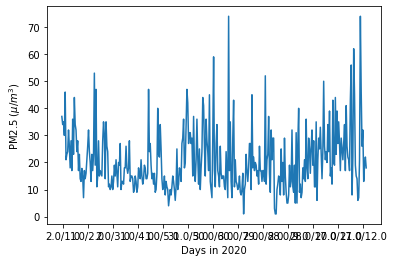

In [261]:
import matplotlib.pyplot as plt
plt.plot(xlabel, datasets[:, -1:])
plt.xlabel('Days in ' + str(year))
plt.ylabel('PM2.5 ($\mu / m^3$)')
plt.xticks(range(1, 365, 30))
plt.savefig(str(year) + 'modified.png')